# 머신러닝 - 비지도 학습

## k-평균
[강의자료](https://github.com/yonggyo1125/lecture_ml-dl/tree/master/06.%20%EB%B9%84%EC%A7%80%EB%8F%84%20%ED%95%99%EC%8A%B5/06-2.%20k-%ED%8F%89%EA%B7%A0)

### 키워드 정리
- k-평균
    - 처음에 랜덤하게 클러스터의 중심을 정하고 클러스터를 만듭니다. 그 다음 클러스터의 중심을 이동하고 다시 클러스터를 만드는 식으로 반복해서 최적의 클러스터를 구성하는 알고리즘입니다.
- 클러스터 중심
    - k-평균 알고리즘이 만든 클러스터에 속한 샘플의 특성 평균값니다.
    - 센트로이드(centroid)라고도 부릅니다. 가장 가까운 클러스터 중심을 샘플의 또 다른 특성으로 사용하거나 새로운 새믈에 대한 예측으로 활용할 수 있습니다.
- 엘보우 방법
    - 최적의 클러스터 개수를 정하는 방법 중 하나입니다.
    - 이너셔는 클러스터 중심과 샘플 사이 거리의 제곱 합입니다. 클러스터 개수에 따라 이니셔 감소가 꺾이는 지점이 적절한 클러스터 개수 k가 될 수 있습니다.
    - 이 그래프의 모양을 따서 엘보우 방법이라고 부릅니다.

### 핵심 패키지와 함수
`scikit-learn`의 `KMeans`
- k-평균 알고리즘 클래스입니다.
- n_clusters 에는 클러스터 개수를 지정합니다. 기본값은 8입니다.
- 처음에는 랜덤하게 센트로이드를 초기화하기 때문에 여러 번 반복하여 이너셔를 기준으로 가장 좋은 결과를 선택합니다. n_init는 이 반복 횟수를 지정합니다. 기본값은 10이었으나 사이킷런 버전 1.4에서는 auto로 변경될 예정입니다.
- max_iter는 k-평균 알고리즘의 한 번 실행에서 최적의 센트로이드를 찾기 위해 반복할 수 있는 최대 횟수입니다. 기본값은 200입니다.

### 비지도 학습
- day07에서 배운 것:\
    사과, 파인애플, 바나나 사진들의 각 픽셀의 평균값을 구해 대표 사진 생성.
- 위 방법의 문제점:\
    이 경우엔 각 사진들이 사과, 파인애플, 바나나 사진인 것을 미리 알고 있었기에 각 과일의 픽셀 평균값을 구할 수 있었던 것.
    하지만, 진짜 비지도 학습에선 사진에 어떤 과일이 들어 있는지 알지 못함.
- 해결법:\
    **k-평균(k-means) 군집 알고리즘**을 사용하면 평균값을 자동으로 찾아 줌.
    이 평균값이 클러스터의 중심에 위치하기 때문에, **클러스터 중심(cluster center)** 또는 **센트로이드(centroid)**라고 부름.

In [123]:
# 과일 데이터 불러오기
import numpy as np

fruits = np.load('fruits_300.npy')
fruits.shape

(300, 100, 100)

In [124]:
fruits_2d = fruits.reshape(-1, 100 * 100)  # 너비 100, 높이 100을 1차원 배열 10000개 변환

⭣ k-평균 모델을 훈련하기 위해 (샘플 개수, 너비, 높이) 크기의 3차원 배열을 (샘플 개수, 너비 * 높이) 크기를 가진 2차원 배열로 변경

In [125]:
# KMeans 클래스를 불러오고, 학습
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)  # n_clusters: 군집의 개수
km.fit(fruits_2d)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [126]:
# 군집 분포, km.labels_
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [127]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))

In [128]:
# 10행 10열로 과일 이미지를 출력하는 함수 - 사이즈를 줄인다?
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1):  # arr: 과일 이미지 데이터 배열, ratio: 확대 비율
    # 전체 샘플의 개수
    total = len(arr)

    # 예외처리: 샘플이 안 넘어왔을 때
    if total == 0:
        print("Error: 이미지 샘플이 없습니다.")
        return

    # 전체 행의 개수
    rows = int(np.ceil(total / 10))

    # 한 행당 열의 개수
    cols = total if rows == 1 else 10  # 행이 1개일 때는 전체 개수가 열의 개수, 그 이상일 때는 10개로 열의 개수 제한(고정)

    _, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio))

    # 새로 추가 S
    if not isinstance(axs, np.ndarray) or axs.ndim < 2:  # 2차원 배열이 아닐 때만 2차원 배열로 변환
        axs = np.atleast_2d(axs)
    # 새로 추가 E

    for i in range(rows):
        for j in range(cols):
            # 1차원 배열에서의 2차원 배열 위치
            # ex - 3번째 행 1번째 열의 데이터(0이 시작) => 10 * 행_위치(3) + 열_위치(1)
            curr = i * 10 + j
            if curr < total:
                axs[i, j].imshow(arr[curr], cmap='gray_r')

            axs[i, j].axis('off')
    
    plt.show()

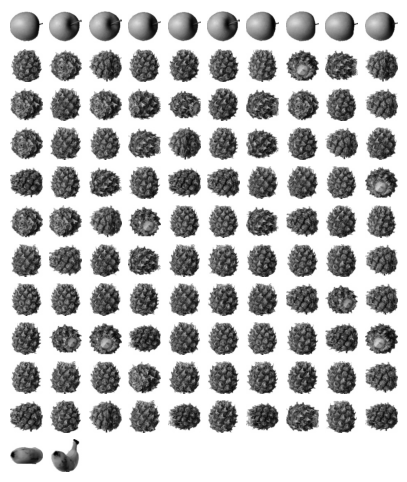

In [129]:
draw_fruits(fruits[km.labels_ == 0], 0.5)

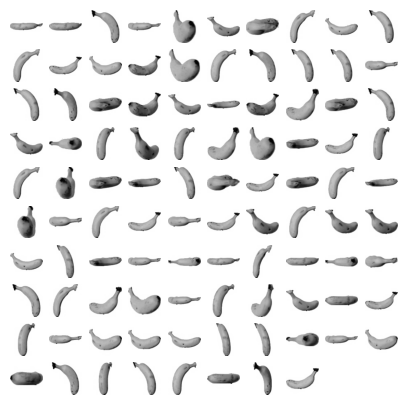

In [130]:
draw_fruits(fruits[km.labels_ == 1], 0.5)

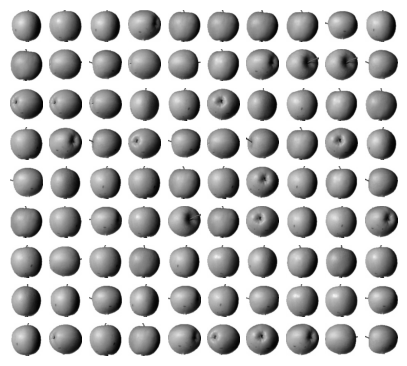

In [131]:
draw_fruits(fruits[km.labels_ == 2], 0.5)

In [132]:
draw_fruits(fruits[km.labels_ == 3])

Error: 이미지 샘플이 없습니다.


In [133]:
# 클러스터의 중심점을 찾기 위한 반복 횟수
km.n_iter_

4

In [134]:
# 클러스터의 중심, 군집의 평균치
km.cluster_centers_

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.10204082, 1.07142857, 1.10204082, ..., 1.        , 1.        ,
        1.        ],
       [1.01111111, 1.01111111, 1.01111111, ..., 1.        , 1.        ,
        1.        ]], shape=(3, 10000))

KMeans 클래스가 최종적으로 찾은 클러스터 중심은 cluster_centers_ 속성에 저장되어 있음.\
이 배열은 fruits_2d 샘플의 클러스터 중심이기 때문에 각 중심을 이미지로 출력하려면 100 X 100 크기의 2차원 배열로 바꿔야 한다.

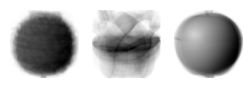

In [135]:
# 각 클러스터 중심의 평균 벡터 (해당 클러스터에 속한 이미지들의 평균 이미지)

# _, axs = plt.subplots(1, 3, figsize=(9, 3))
# axs[0].imshow(km.cluster_centers_.reshape(-1, 100, 100)[0], cmap='gray_r')
# axs[1].imshow(km.cluster_centers_.reshape(-1, 100, 100)[1], cmap='gray_r')
# axs[2].imshow(km.cluster_centers_.reshape(-1, 100, 100)[2], cmap='gray_r')

draw_fruits(km.cluster_centers_.reshape(-1, 100, 100))
# 🍍🍌🍎

In [ ]:
# km.transform(...) : 클러스터 중심(센트로이드)에서 얼마나 떨어져 있는지 계산

# 100번째 과일 이미지가 각 클러스터 중심과 얼마나 떨어져 있는지 계산 (거리)
km.transform(fruits_2d[100:101])  # KMeans.transform()은 2차원 입력만 받기 때문에,
                                  # [100]이 아니라 [100:101]와 같이 슬라이싱해서
                                  # (1, n_features) 형태의 2차원 배열로 전달해야 한다

array([[3400.24197319, 8837.37750892, 5279.33763699]])

In [144]:
# 클러스터 중심 중 가장 가까운 클러스터는 몇 번인지 예측
# [[3400.24197319, 8837.37750892, 5279.33763699]] -> 0번(파인애플)과 가장 가깝다고 판단!

km.predict(fruits_2d[100:101])  # 클러스트의 중심에서 가장 가까운 클러스터는 0번

array([0], dtype=int32)

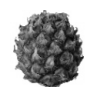

In [145]:
draw_fruits(fruits[100:101])  # 100번째 과일 이미지 그리기
# 🍍 -> 정답!

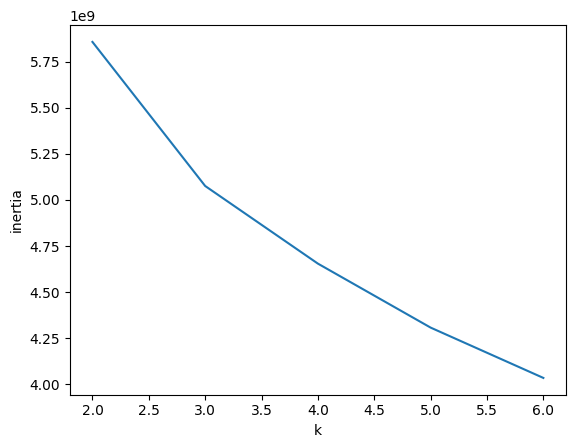

In [139]:
# 클러스터의 개수(군집의 최적 개수)를 결정하는 방법 - inertia 값을 가지고 꺾이는 지점을 찾는다

inertia = []

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

k = 3에서 그래프의 기울기가 조금 바뀐 것을 확인할 수 있다.
엘보우 지점(k = 3)보다 클러스터 개수가 많아지면, 이너셔(inertia)의 변화가 줄어들면서 군집 효과도 줄어든다.